# 1) 데이터 읽기

In [148]:
import pandas as pd

df = pd.read_csv('./abalone.csv')

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [149]:
# "Outcome" 항목 삭제
df = df.drop('id', axis = 1)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2) 결측치 확인

In [150]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

# 3) 상관 관계 행렬 확인하기

상관관계 행렬을 확인하기 위해서는 Feature에 문자열이 있으면 안된다.
One-Hot Encoding을 통해 Sex값을 인코딩해준다.

In [151]:
df = pd.get_dummies(df, columns=['Sex'])

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True,False,False


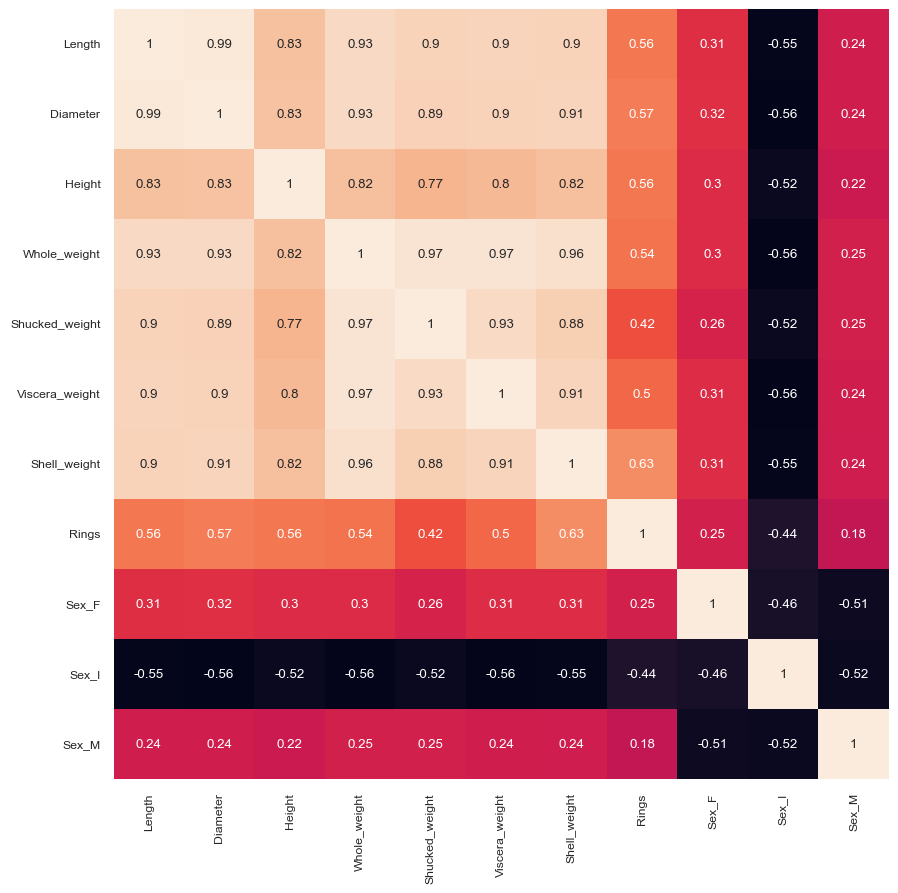

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Rings와 가장 높은 상관관계를 가진 feature : Shell_weight

# 4) X, Y 나누기

In [153]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

print(X.head())
print()
print(Y.value_counts())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150  False  False   True  
1         0.070  False  False   True  
2         0.210   True  False  False  
3         0.155  False  False   True  
4         0.055  False   True  False  

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dty

# 5) 데이터 스케일링

In [154]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,1.481846,-0.688018,-0.759488
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,-0.674834,-0.688018,1.316677
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.674834,-0.688018,1.316677
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,1.481846,-0.688018,-0.759488


# 6) Train데이터, Test데이터 나누기

In [155]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 7) 모델 정의, 학습, 예측

## Linear Regression

평균제곱근오차 (Linear Regreesion) 5.006878548779927


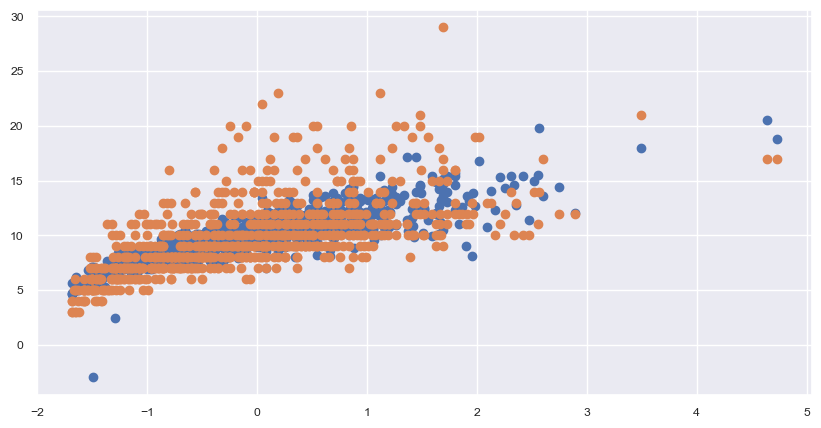

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print('평균제곱근오차 (Linear Regreesion)', mean_squared_error(y_pred, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()

## Decision Tree

평균제곱근오차 (DecisionTreeRegressor) 8.79066985645933


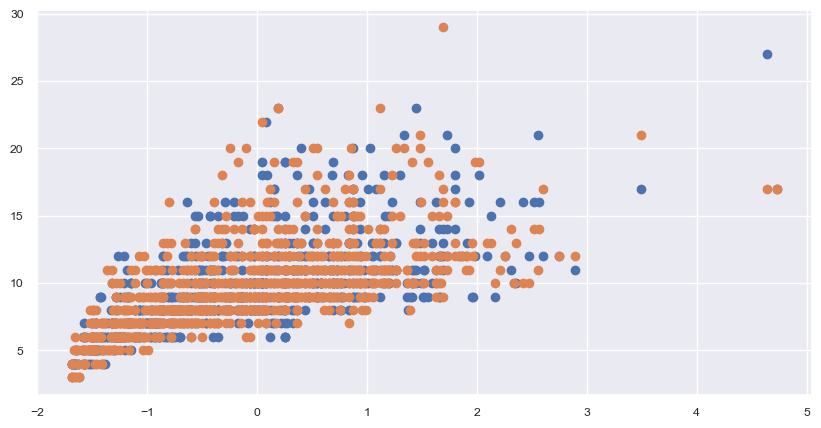

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print('평균제곱근오차 (DecisionTreeRegressor)', mean_squared_error(y_pred, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()      

## Random Forest

평균제곱근오차 (Random Forest) 4.664024401913876


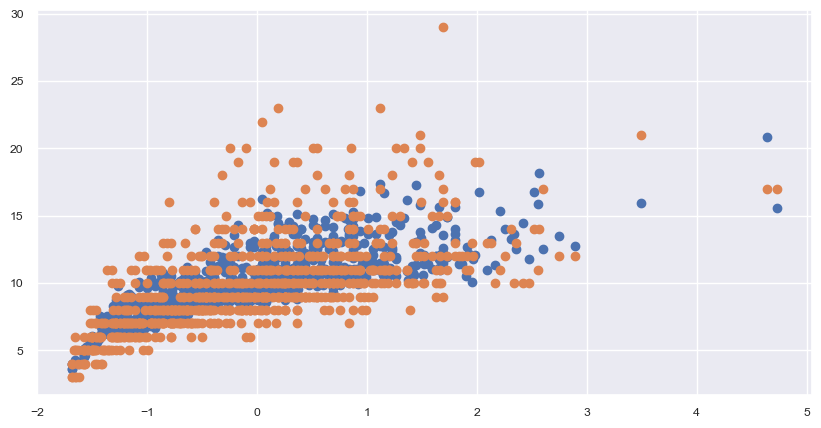

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


print('평균제곱근오차 (Random Forest)', mean_squared_error(y_pred, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()      

## Support Vector Regressor

평균제곱근오차 (SVR) 4.864425340978151


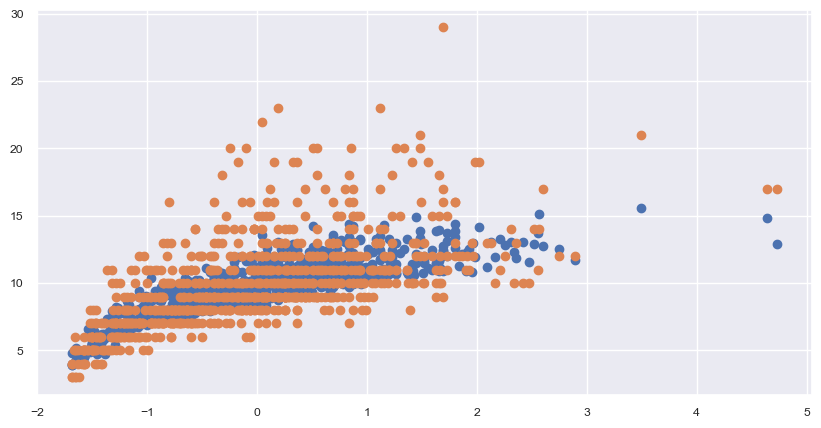

In [159]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

model = SVR()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# # 예측값을 정수형으로 변환
# y_pred_int = np.around(y_pred)

print('평균제곱근오차 (SVR)', mean_squared_error(y_pred, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()

# 결론
## 위의 데이터에서는 RandomForest가 가장 높은 예측률을 가지고 있다.
하지만 MSE가 높지 않다. 그래프를 확인해보니, Data Imbalance가 문제의 원인임을 알 수 있었다.
예측값의 대부분은 Rings가 5~15 사이의 값을 가지고 있다.
실제로 Y값 중 15 이상인 값은 3916개 중 261개로 6%밖에 되지 않았다.

In [160]:
print(np.sum(Y > 15))
print(np.sum(Y <= 15))

print("Ring이 15 이상인 비율 : ", 261 / 3916)

261
3916
Ring이 15 이상인 비율 :  0.06664964249233912


Ring > 15 인 경우를 Outliar로 가정하고 다시 Regression을 해보자.

In [161]:
df = df[(df['Rings'] >= 5) & (df['Rings'] <= 15)]

df.value_counts('Rings')

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64

Text(0.5, 1.0, 'How old abalone is')

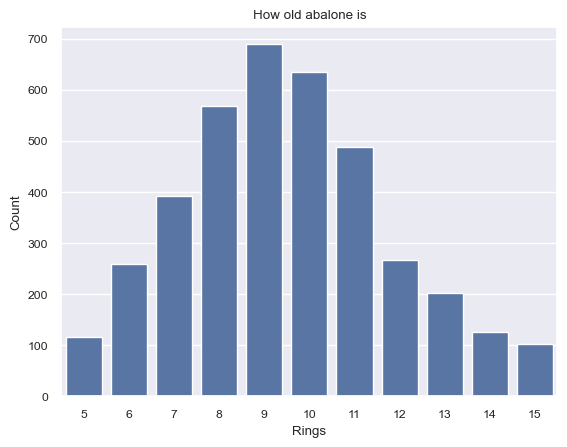

In [162]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("How old abalone is")

In [163]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

print(X.head())
print()
print(Y.value_counts())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150  False  False   True  
1         0.070  False  False   True  
2         0.210   True  False  False  
3         0.155  False  False   True  
4         0.055  False   True  False  

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64


In [164]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.614302,-0.459694,-1.093299,-0.637889,-0.613253,-0.727033,-0.636132,-0.667826,-0.695680,1.317751
1,-1.535413,-1.521813,-1.217743,-1.242812,-1.178809,-1.214092,-1.252816,-0.667826,-0.695680,1.317751
2,0.043634,0.124471,-0.097754,-0.296112,-0.468470,-0.351302,-0.173620,1.497396,-0.695680,-0.758869
3,-0.745890,-0.459694,-0.346640,-0.633695,-0.653973,-0.606428,-0.597590,-0.667826,-0.695680,1.317751
4,-1.710863,-1.628025,-1.466629,-1.285796,-1.224054,-1.297588,-1.368444,-0.667826,1.437443,-0.758869
...,...,...,...,...,...,...,...,...,...,...
4172,0.350671,0.443107,0.648906,0.144213,0.045055,0.553237,0.127013,1.497396,-0.695680,-0.758869
4173,0.569983,0.336895,-0.097754,0.309859,0.357242,0.325942,0.215662,-0.667826,-0.695680,1.317751
4174,0.657708,0.708637,1.644451,0.750185,0.748607,1.003187,0.581817,-0.667826,-0.695680,1.317751
4175,0.877020,0.814849,0.275576,0.579297,0.773492,0.757338,0.489315,1.497396,-0.695680,-0.758869


In [165]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

평균제곱근오차 (Random Forest) 2.700399349804942


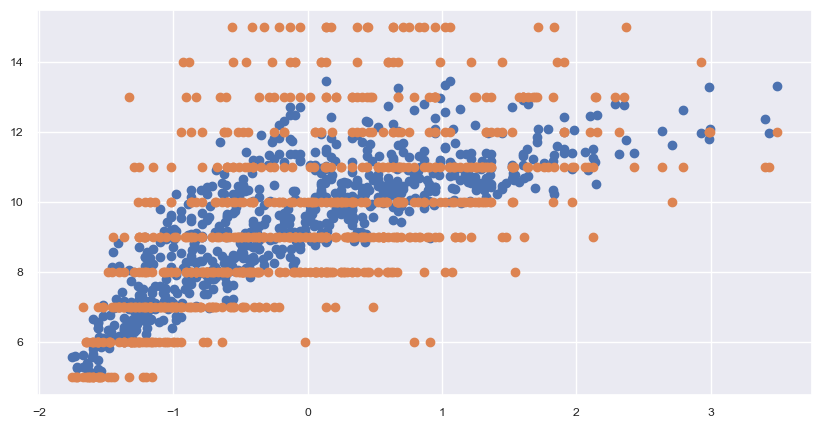

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print('평균제곱근오차 (Random Forest)', mean_squared_error(y_pred, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()      

예측값을 반올림했을때는 어떤 결과가 나오는지 확인해보자

평균제곱근오차 (Random Forest) 2.811443433029909


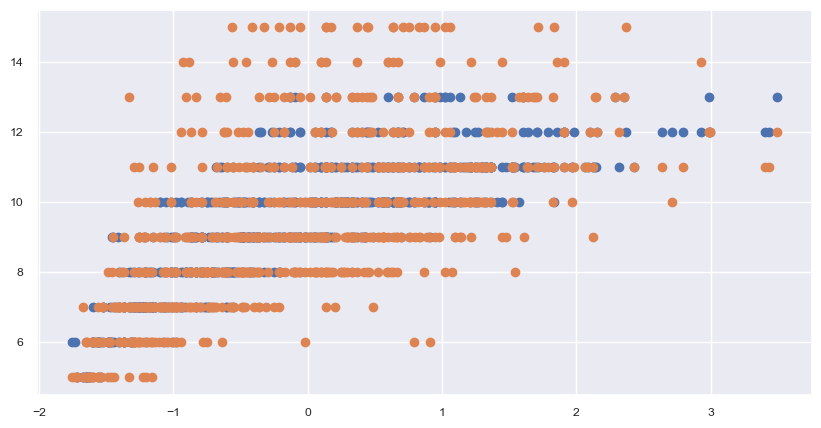

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 예측값을 정수형으로 변환
y_pred_int = np.around(y_pred)

print('평균제곱근오차 (Random Forest)', mean_squared_error(y_pred_int, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred_int, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()      

In [113]:
df = pd.Series(y_pred_int)
distribution = df.value_counts()
print(distribution)

10.0    191
11.0    138
9.0     127
8.0      96
7.0      83
12.0     61
6.0      37
13.0     20
5.0      16
Name: count, dtype: int64


In [169]:
Y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64

Data의 Count값이 200개 이상인 값만 추려서 마지막으로 예측해보자

In [170]:
df = df[(df['Rings'] >= 6) & (df['Rings'] <= 13)]

df.value_counts('Rings')

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
Name: count, dtype: int64

평균제곱근오차 (Random Forest) 2.022795142857143


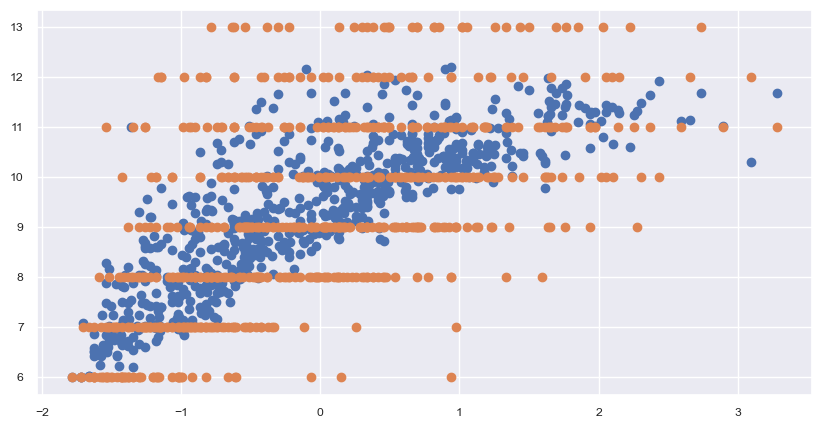

In [171]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print('평균제곱근오차 (Random Forest)', mean_squared_error(y_pred, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_pred, label='Y_test')
plt.scatter(X_test['Shell_weight'], Y_test, label='Y_test')
plt.show()      